In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA,ARIMA


## 自回归Auto Regressive (AR only) model 
自回归模型是描述当前值与历史值之间的关系的模型，是一种用变量自身的历史事件数据对自身进行预测的方法。其公式如下：  

$$Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2}+..  \beta_p Y_{t-p} + \epsilon_t  $$


$Y_t$是当前值；$\alpha$ 是常数项（截距）；p是阶数；$\beta_1$ 是自相关系数，ϵt是误差值


自回归模型的使用有以下四项限制：

 

该模型用自身的数据进行预测，即建模使用的数据与预测使用的数据是同一组数据；使用的数据必须具有平稳性；使用的数据必须有自相关性，如果自相关系数小于0.5，则不宜采用自回归模型；自回国模型只适用于预测与自身前期相关的现象。
 

## integrated

ARIMA模型最重要的地方在于时序数据的平稳性。平稳性是要求经由样本时间序列得到的拟合曲线在未来的短时间内能够顺着现有的形态惯性地延续下去，即数据的均值、方差理论上不应有过大的变化。平稳性可以分为严平稳与弱平稳两类。严平稳指的是数据的分布不随着时间的改变而改变；而弱平稳指的是数据的期望与向关系数（即依赖性）不发生改变。在实际应用的过程中，严平稳过于理想化与理论化，绝大多数的情况应该属于弱平稳。对于不平稳的数据，我们应当对数据进行平文化处理。最常用的手段便是差分法，计算时间序列中t时刻与t-1时刻的差值，从而得到一个新的、更平稳的时间序列。

## 移动平均 Moving Average (MA only) model
移动平均模型关注的是自回归模型中的误差项的累加。它能够有效地消除预测中的随机波动。

$$Y_t = \alpha +  \epsilon_t  + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2}+..  \phi_q \epsilon_{t-q} $$


AR+MA =ARMA 即：

$$Y_t = \alpha + \epsilon_t  + \beta_1 Y_{t-1} + \beta_2 Y_{t-2}+..  \beta_p Y_{t-p} +  \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2}+..  \phi_q \epsilon_{t-q} $$

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

ARMA + integrated = ARIMA

在这个公式中，p与q分别为自回归模型与移动平均模型的阶数，是需要人为定义的。γi与θi分别是两个模型的相关系数，是需要求解的。如果原始数据不满足平稳性要求而进行了差分，则为差分自相关移动平均模型（ARIMA），将差分后所得的新数据带入ARMA公式中即可

 

# 湖北省GPP预测案例
[时间序列模型(ARIMA)](https://www.jianshu.com/p/4130bac8ebec)

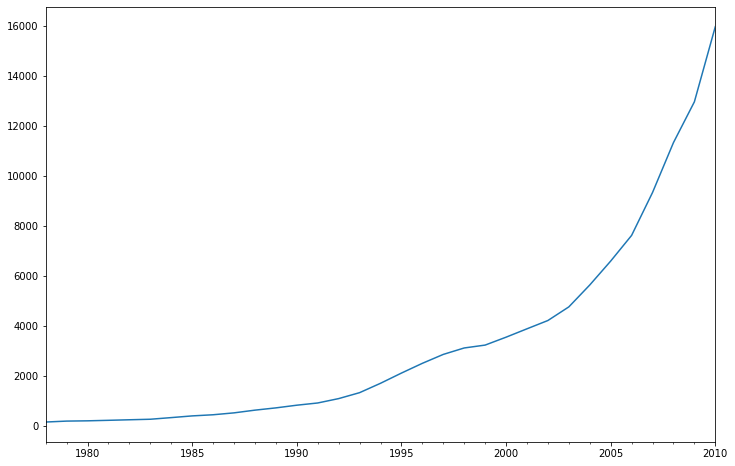

In [2]:
time_series = pd.Series([151.0, 188.46, 199.38, 219.75, 241.55, 262.58, 328.22, 396.26, 442.04, 517.77, 626.52, 717.08, 824.38, 913.38, 1088.39, 1325.83, 1700.92, 2109.38, 2499.77, 2856.47, 3114.02, 3229.29, 3545.39, 3880.53, 4212.82, 4757.45, 5633.24, 6590.19, 7617.47, 9333.4, 11328.92, 12961.1, 15967.61])
time_series.index = pd.Index(sm.tsa.datetools.dates_from_range('1978','2010'))
time_series.plot(figsize=(12,8))
plt.show()

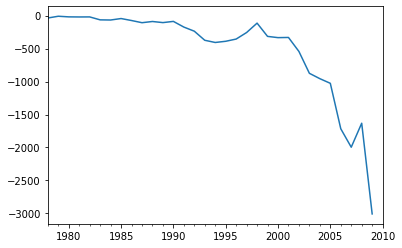

In [3]:
time_series = time_series.copy().diff(-1)
time_series.plot()

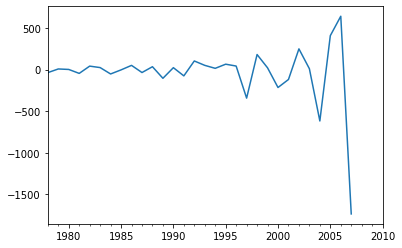

In [4]:
time_series = time_series.copy().diff(-1).diff(-1)
time_series.plot()

In [5]:
# Create Training and Test
train_size= int(len(time_series)*0.85)
test_size= len(time_series) -train_size
train = time_series[:train_size]
test = time_series[train_size:]

In [14]:
import pmdarima as pm
model = pm.auto_arima(train, start_p=3, start_q=3,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=7, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1511.087, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1644.159, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1533.876, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1559.426, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1509.058, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1507.814, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1505.891, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1520.197, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1506.614, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1512.017, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1506.002, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1497.064, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1496.582, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : 

In [15]:
# Build Model
p,d,q=model.order  # pmdarima.auto_arima自动计算出最佳的p,d,组合
model = ARIMA(train, order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(test_size, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   90
Model:                     ARMA(0, 2)   Log Likelihood                -744.291
Method:                       css-mle   S.D. of innovations            936.812
Date:                Tue, 13 Apr 2021   AIC                           1496.582
Time:                        14:37:12   BIC                           1506.582
Sample:                             0   HQIC                          1500.615
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1474.5370    261.032      5.649      0.000     962.923    1986.151
ma.L1.y        1.1767      0.089     13.257      0.000       1.003       1.351
ma.L2.y        0.4903      0.076      6.437      0.0

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# 航空乘客人数案例


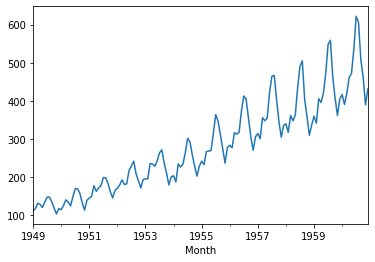

In [16]:
# 读入数据
data = pd.read_csv('./data/airline-passengers.csv',parse_dates=[0])
time_series = data['Passengers']
time_series.index = pd.DatetimeIndex(data['Month'], freq='infer')
time_series.plot()

In [18]:
# Create Training and Test
train_size= int(len(time_series)*0.85)
test_size= len(time_series) -train_size
train = time_series[:train_size]
test = time_series[train_size:]

In [39]:
import pmdarima as pm
auto_model = pm.auto_arima(train, start_p=3, start_q=3,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=16, max_q=16, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
#                       start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1709.793, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1159.747, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1157.902, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1163.932, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1158.841, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1158.592, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1159.510, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1155.257, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1156.008, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1159.855, Time=0

2 0 1


/Users/lcz/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lcz/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lcz/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  122
Model:                     ARMA(4, 3)   Log Likelihood                -553.646
Method:                       css-mle   S.D. of innovations             21.180
Date:                Wed, 14 Apr 2021   AIC                           1125.293
Time:                        17:30:09   BIC                           1150.529
Sample:                    01-01-1949   HQIC                          1135.543
                         - 02-01-1959                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2176.5620        nan        nan        nan         nan         nan
ar.L1.Passengers     1.9553   1.45e-10   1.35e+10      0.000       1.955       1.955
ar.L2.Passengers    -0.7224 

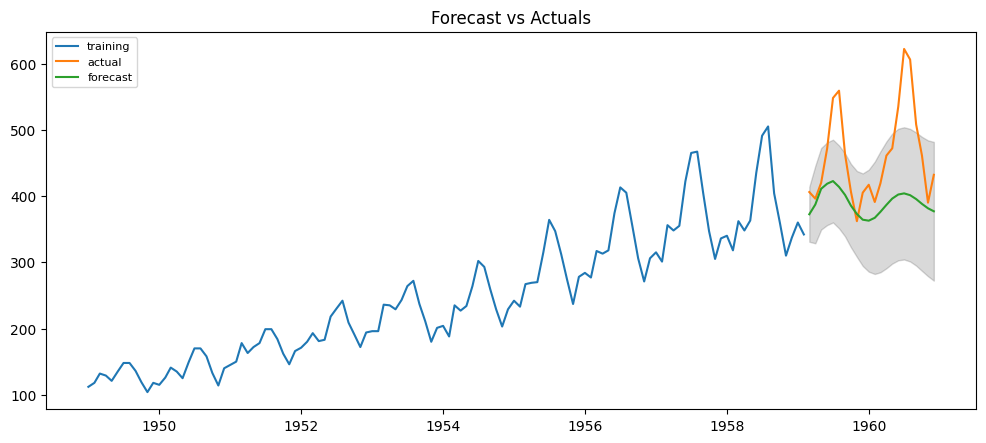

In [40]:
# Build Model
p,d,q=auto_model.order  # pmdarima.auto_arima自动计算出最佳的p,d,组合
print(p,d,q)
p,d,q=4,0,3  # pmdarima.auto_arima自动计算出最佳的p,d,组合
model = ARIMA(train, order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(test_size, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(test,fc_series)
print('mse=',mse)

mse= 8717.403539150071


这个结果不是太理想

# pmdarima的官方案例
http://alkaline-ml.com/pmdarima/auto_examples/arima/example_auto_arima.html

Automatically created module for IPython interactive environment
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -739.943
Date:                Tue, 13 Apr 2021   AIC                           1487.885
Time:                        14:36:07   BIC                           1497.884
Sample:                             0   HQIC                          1491.917
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    697.5482    226.238      3.083      0.002     254.130    1140.966
ar.L1          1.1552      0.070     16.557      0.000       1.018

Text(0.5, 0, 'Year')

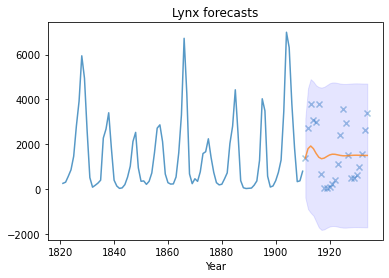

In [13]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_lynx()
train, test = model_selection.train_test_split(data, train_size=90)

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')
print(modl.summary())
# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")